# Week 10 - PCA and Dimension Reduction Homework
Execute the below code and answer the following questions. __Do NOT commit the csv file!__

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import make_classification

def generate_data():
    x, y = make_classification(n_samples=1500, 
                            n_features = 20,
                            n_informative = 8,
                            n_redundant = 5,
                            n_repeated = 1, 
                            n_classes = 3,
                            weights = (0.5, 0.25, 0.25),
                            random_state = 120
                            )
    colNames = ['var'+str(x) for x in range(20)]
    colNames.append('target')

    df = pd.DataFrame(np.concatenate((x,y.reshape(-1,1)), axis=1), columns=colNames)
    df.to_csv('pca-dataset.csv', index=False)
    
generate_data()

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

df = pd.read_csv('pca-dataset.csv')
df.head()

,var0,var1,var2,var3,var4,var5,var6,var7,var8,var9,...,var11,var12,var13,var14,var15,var16,var17,var18,var19,target
0,-2.882513,-3.272465,-2.520732,-1.987174,-2.073689,-3.272465,-1.237969,1.690547,-0.211314,-5.753190,...,-0.574979,-1.916275,-5.994075,-3.349615,-0.846193,2.491347,1.360958,-2.892522,-1.377561,0.0
1,0.775242,-1.015994,0.005137,0.057274,0.590205,-1.015994,1.350954,-1.493037,-0.862391,-1.986047,...,0.523760,0.399579,0.088600,0.718606,-1.112030,0.083929,0.606544,-1.376793,1.302641,2.0
2,-0.876376,0.220453,3.114224,-1.640025,1.180348,0.220453,0.465102,0.222511,0.880455,2.922315,...,-0.370516,3.585262,-2.168162,2.693429,-0.966636,1.586302,-2.821546,0.482164,0.187404,0.0
3,-2.550342,-1.968144,0.077681,-1.887719,1.864445,-1.968144,-0.527958,-0.201467,-0.532649,2.287445,...,-0.041341,2.383582,-0.417253,1.305379,-0.435123,-0.468557,0.923290,3.880050,2.676798,1.0
4,-0.454974,1.293300,0.112201,-0.589989,-1.674321,1.293300,0.487302,1.776318,0.702520,-1.024127,...,-0.452869,-0.667306,0.345364,-3.920591,-0.438296,-1.690141,0.176906,1.920142,1.474634,0.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   var0    1500 non-null   float64
 1   var1    1500 non-null   float64
 2   var2    1500 non-null   float64
 3   var3    1500 non-null   float64
 4   var4    1500 non-null   float64
 5   var5    1500 non-null   float64
 6   var6    1500 non-null   float64
 7   var7    1500 non-null   float64
 8   var8    1500 non-null   float64
 9   var9    1500 non-null   float64
 10  var10   1500 non-null   float64
 11  var11   1500 non-null   float64
 12  var12   1500 non-null   float64
 13  var13   1500 non-null   float64
 14  var14   1500 non-null   float64
 15  var15   1500 non-null   float64
 16  var16   1500 non-null   float64
 17  var17   1500 non-null   float64
 18  var18   1500 non-null   float64
 19  var19   1500 non-null   float64
 20  target  1500 non-null   float64
dtypes: float64(21)
memory usage: 246.2 KB

In [13]:
from sklearn.model_selection import train_test_split

X = df[[x for x in df.columns if x.startswith('var')]]
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

print(f'Training samples: {X_train.shape[0]:,}')
print(f'Test samples: {X_test.shape[0]:,}')

print('\nFeatures:')
print(*X_train, sep='\t')

Training samples: 1,200
Test samples: 300

Features:
var0	var1	var2	var3	var4	var5	var6	var7	var8	var9	var10	var11	var12	var13	var14	var15	var16	var17	var18	var19


### Data Description
- `var1 - var19`: a feature for the data.  
- `target`: variable we wish to be able to predict, which is 1 of 3 classes.

# Question 1
- Use principle components analysis to determine the number of components to reduce the data to by evaluating the explained variance ratio (use `X_train`).  
- Remember to scale the data first.  
- What number of components would you recommend based on your analysis?  
- Explain your results using markdown cells.

#### calculating components from eigenvalues and vectors

/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


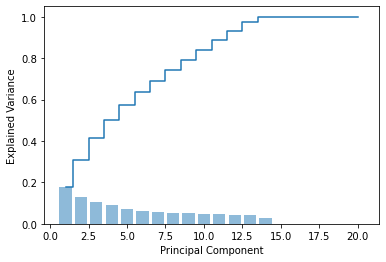

In [190]:
# Import necessary libraries
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

# Standardize the features using StandardScaler
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

# Calculate the covariance matrix for the standardized training data
cov_mat = np.cov(X_train_std.T)

# Ensure symmetry in the covariance matrix
cov_matrix = (cov_mat + cov_mat.T) / 2.0

# Display the rounded covariance matrix
cov_matrix.round(1)

# Compute the eigenvalues and eigenvectors of the covariance matrix
eigen_vals, eigen_vecs = np.linalg.eig(cov_matrix)

# Calculate the total variance
tot = sum(eigen_vals)

# Calculate the explained variance and cumulative explained variance
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

# Plot the explained variance and cumulative explained variance
plt.bar(range(1, 21), var_exp, alpha=0.5, align='center', label='Variance Explained')
plt.step(range(1, 21), cum_var_exp, where='mid', label='Cumulative Explained')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance')
plt.show()


#### using PCA as inbuilt

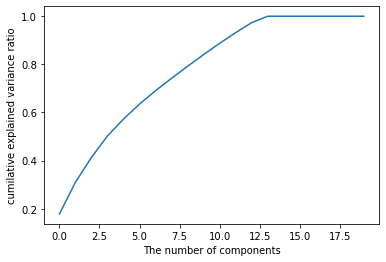

In [124]:
from sklearn.decomposition import PCA
pca_ = PCA()
pca_.fit(X_train_std)

Variance_Ratio =  pca_.explained_variance_ratio_
cumulative_Variance_Ratio = np.cumsum(Variance_Ratio)
plt.plot(cumulative_Variance_Ratio)
plt.xlabel('The number of components')
plt.ylabel('cumilative explained variance ratio')
plt.show()

 the component having variance percentage  greater than 95% can be considered.so from graphs we can consider 13 components.

<Insert comments>

# Question 2
- Evaluate the target variable in the `df` object.  
- Which metric would you use in evaluating a predictive model. Explain your choice in the markdown cell. 

0.0    744
2.0    380
1.0    376
Name: target, dtype: int64


<AxesSubplot:>

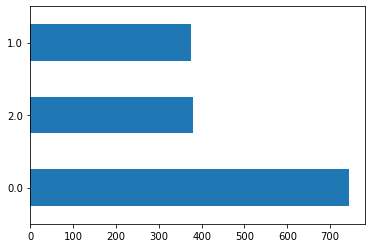

In [125]:

y=df['target']
print(y.value_counts())
y.value_counts().plot.barh()

In [191]:
# Import necessary libraries for performance metrics and Support Vector Machine (SVM) classifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.svm import SVC

# Create an instance of the Support Vector Machine (SVM) classifier
classifier = SVC()

# Train the classifier using the training data
classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = classifier.predict(X_test)

# Calculate and print various performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')


Accuracy: 0.8900
Precision: 0.8903
Recall: 0.8900
F1 Score: 0.8893


In evaluating the predictive model for the target variable with three different classes (0, 1, 2) in the `df` object, I would consider using multiclass metrics such as accuracy, precision, recall, and F1 score. These metrics provide a comprehensive understanding of the model's performance across all classes. The choice of a specific metric would depend on the relative importance of correctly predicting each class and the associated costs of false positives and false negatives for each class.


# Question 3
- Without using PCA, create a logistic regression model using practices discussed in class.  
- Which model would you choose? Explain your results in the markdown cells.    
- What is the accuracy, precision, and recall for the test data?  

Using grdisearch and logistic regression model

In [192]:
# Import necessary libraries for logistic regression, performance metrics, grid search, and data preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV

# Create an instance of the Logistic Regression model with a specified random state
logistic_model = LogisticRegression(random_state=45)

# Define a parameter grid for hyperparameter tuning using GridSearchCV
param_grid = {
    'C': [0.1, 1, 10]
}

# Perform grid search with cross-validation (cv=5) to find the best hyperparameters
results = GridSearchCV(logistic_model, param_grid=param_grid, cv=5)
results.fit(X_train_std, y_train)

# Make predictions on the training and test data using the best estimator from grid search
y_train_pred_without_PCA = results.best_estimator_.predict(X_train_std)
y_test_pred_without_PCA = results.best_estimator_.predict(X_test_std)

# Calculate and print various performance metrics
accuracy = accuracy_score(y_test, y_test_pred_without_PCA)
precision = precision_score(y_test, y_test_pred_without_PCA, average='weighted')
recall = recall_score(y_test, y_test_pred_without_PCA, average='weighted')
f1 = f1_score(y_test, y_test_pred_without_PCA, average='weighted')

# Display the performance metrics
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1 Score: ", f1)


Accuracy:  0.7033333333333334
Precision:  0.7040254342431762
Recall:  0.7033333333333334
F1 Score:  0.702671996347409


In [180]:
# Accuracy on training data without PCA
accuracy = accuracy_score(y_train, y_train_pred_without_PCA)
print("Accuracy on training data without PCA",accuracy)

0.7258333333333333


using  eigenvalues and eigenvectors and logistic regression

In [193]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Calculate and sort eigenvalue-eigenvector pairs
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i]) for i in range(len(eigen_vals))]
eigen_pairs.sort(key=lambda k: k[0], reverse=True)

# Set the desired number of principal components
number_of_components = 13

# Select the top eigenpairs based on eigenvalues
selected_eigenvectors = [np.real([pair[1][:, np.newaxis] for pair in eigen_pairs[:number_of_components]])]
w = np.hstack(selected_eigenvectors)
w = w.reshape(-1, number_of_components)

# Project the standardized training and test data onto the selected eigenvectors
X_train_pca = X_train_std.dot(w)
X_test_pca = X_test_std.dot(w)

# Create an instance of the Logistic Regression model
model = LogisticRegression(random_state=42)

# Train the model using the training data transformed by PCA
model.fit(X_train_pca, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test_pca)

# Calculate and print various performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

# Display the performance metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)


Accuracy: 0.6566666666666666
Precision: 0.6543828080606774
Recall: 0.6566666666666666


# Question 4
- Use PCA within a pipeline to create a logistic regression model using best practices from class.  
- Which model performs the best on the training data? Explain your results in markdown cells.  
- What is the accuracy, precision, and recall for the test data?
- Does this perform better than the original logistic regression model?

In [194]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA

# Create a pipeline with scaling, PCA, and Logistic Regression
p = Pipeline([
    ('scaling', StandardScaler()), 
    ('pca', PCA()),
    ('model', LogisticRegression())
])

# Define hyperparameters for grid search
params = {
    'model__C': [0.01, 0.1, 1, 10],
    'pca__n_components': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 20]
}

# Perform grid search with cross-validation (cv=10) to find the best hyperparameters
Results = GridSearchCV(p, param_grid=params, scoring='accuracy', cv=10, refit=True)
Results = Results.fit(X_train, y_train)

# Make predictions on the training and test data using the best estimator from grid search
y_train_pred_with_PCA = results.best_estimator_.predict(X_train)
y_test_pred_with_PCA = results.best_estimator_.predict(X_test)

# Evaluate the model performance using various metrics
accuracy = accuracy_score(y_test, y_test_pred_with_PCA)
precision = precision_score(y_test, y_test_pred_with_PCA, average='weighted')
recall = recall_score(y_test, y_test_pred_with_PCA, average='weighted')
f1 = f1_score(y_test, y_test_pred_with_PCA, average='weighted')

# Print the evaluation metrics
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1 Score: ", f1)


Accuracy:  0.6833333333333333
Precision:  0.6853002704581328
Recall:  0.6833333333333333
F1 Score:  0.6826153250773994


In [183]:
accuracy = accuracy_score(y_train, y_train_pred_with_PCA)
print(" Accuracy on training data with PCA ",accuracy)

 Accuracy on training data with PCA  0.7058333333333333


### using PCA the  Accuracy on training data for logistic regression is : 70

### Without PCA the Accuracy on training data for logistic regression  is : 72

Without PCA the model performed good compared to  PCA.

Without PCA Accuracy: 70 percent
using eignevalues and eigenvectors with components : 65 percent
with PCA : 68 percent

So the algorithm performed better with original logistic regression model

# Question 5

- Without using PCA, create a decision tree model using best practices discussed in class.  
- Which model performs the best on the training data? Explain your results in the markdown cells.  
- What is the accuracy, precision, and recall for the test data?  
- Does this perform better than either of the logistic regression models?

In below code i have used standardscalar and decision tree Classifier

In [195]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Create a pipeline with scaling and Decision Tree Classifier
p = Pipeline([
    ('scaling', StandardScaler()),
    ('model', DecisionTreeClassifier(random_state=42))
])

# Define hyperparameters for grid search
params = {
    'model__criterion': ['gini', 'entropy'],
    'model__max_depth': [None, 10, 20, 30],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4]
}

# Perform grid search with cross-validation (cv=10) to find the best hyperparameters
Results_decision_tree = GridSearchCV(p, param_grid=params, scoring='accuracy', cv=10, refit=True)
Results_decision_tree = Results_decision_tree.fit(X_train, y_train)

# Make predictions on the training and test data using the best estimator from grid search
y_train_pred_DT = Results_decision_tree.best_estimator_.predict(X_train)
y_test_pred_DT = Results_decision_tree.best_estimator_.predict(X_test)

# Evaluate the model performance using various metrics
accuracy = accuracy_score(y_test, y_test_pred_DT)
precision = precision_score(y_test, y_test_pred_DT, average='weighted')
recall = recall_score(y_test, y_test_pred_DT, average='weighted')
f1 = f1_score(y_test, y_test_pred_DT, average='weighted')

# Print the evaluation metrics
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1 Score: ", f1)


Accuracy:  0.69
Precision:  0.6916977404567766
Recall:  0.69
F1 Score:  0.6871167159538975


In [186]:
accuracy = accuracy_score(y_train, y_train_pred_DT)
print(" Accuracy on training data without PCA ",accuracy)

 Accuracy on training data without PCA  0.9658333333333333


#### Decission tree performed way better on training data as it gor 96 percent 

Model with decission tree performed good compared to logistic regression.
As the accuracy for decission tree is 69
logistic is : 68

# Question 6
- Repeat `Question 5` but use PCA.  
- Does this perform better than the original Decision Tree or the logistic regression models?

In [187]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA


p = Pipeline([
    ('scaling', StandardScaler()),
    ('pca', PCA()),
    ('model', DecisionTreeClassifier(random_state=42))
])

params = {
    'model__criterion': ['gini', 'entropy'],
    'model__max_depth': [None, 10, 20, 30],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4],
    'pca__n_components': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10,11,12,13,14,15, 20]
}

Results_DT = GridSearchCV(p, param_grid=params, scoring='accuracy', cv=10, refit=True)
Results_DT= Results_DT.fit(X_train, y_train)


y_train_pred_DT_PCA = Results_DT.best_estimator_.predict(X_train)

y_test_pred_DT_PCA = Results_DT.best_estimator_.predict(X_test)

# Evaluate the model performance
accuracy = accuracy_score(y_test, y_test_pred_DT_PCA)
precision = precision_score(y_test, y_test_pred_DT_PCA, average='weighted')
recall = recall_score(y_test, y_test_pred_DT_PCA, average='weighted')
f1 = f1_score(y_test, y_test_pred_DT_PCA,average='weighted')


# Print the evaluation metrics
print(" accuracy ",accuracy)
print(" precision", precision)
print(" recall ",recall)
print("Tf1_score ",f1)



 accuracy  0.73
 precision 0.7325813845665605
 recall  0.73
Tf1_score  0.7284780155838899


In [188]:
accuracy = accuracy_score(y_train, y_train_pred_DT_PCA)
print(" Accuracy on training data with PCA ",accuracy)

 Accuracy on training data without PCA  0.9658333333333333


Decission tree performed good compared to logistic regression as it has accuracy with 73.